### Análise de Dados

**Objetivos**
- Analisar as variávies com relação a resposta (Churn)
- Interpretar o comportamento dos dados

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [24]:
df = pd.read_csv("../Dados/telco_dataset.csv")

In [25]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df.shape

(7043, 21)

#### Criando Funções Auxiliares

In [28]:
def plt_percentages(feature, df):
    g = df.groupby(feature)["Churn"].value_counts().to_frame().reset_index()
    g["% clientes"] = g["count"]/len(df)
    plt.figure(figsize=(10, 4.5))
    ax = sns.barplot(x=feature, y= "% clientes", hue='Churn', data=g, palette="PuBu")
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    ax.plot()

#### Gender & SeniorCitizen

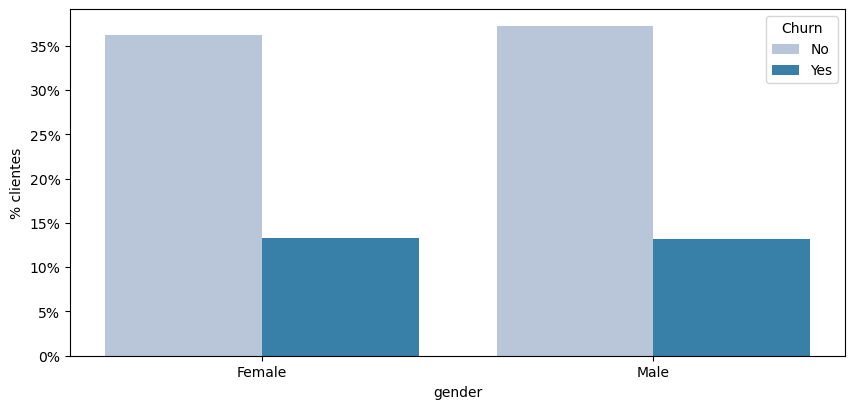

In [29]:
plt_percentages("gender", df)

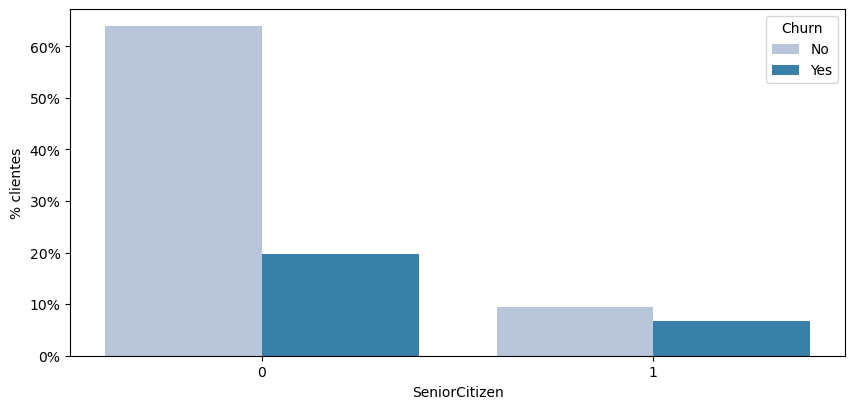

In [30]:
plt_percentages("SeniorCitizen", df)

#### Partners & Dependents

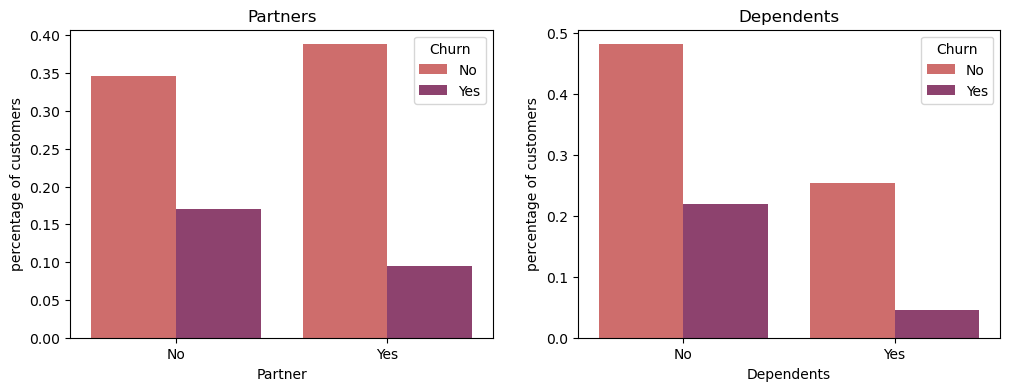

In [31]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Partners")
axis[1].set_title("Dependents")
axis_y = "percentage of customers"

# Partner
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().reset_index().rename(columns={"count": axis_y})
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0], palette = "flare")

# Dependents
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().reset_index().rename(columns={"count": axis_y})
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1], palette = "flare")

#### Telefone e Serviços de Internet

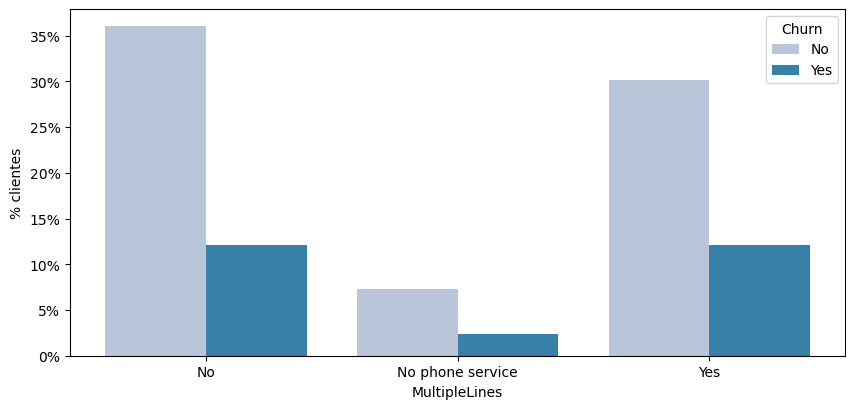

In [32]:
plt_percentages("MultipleLines", df)

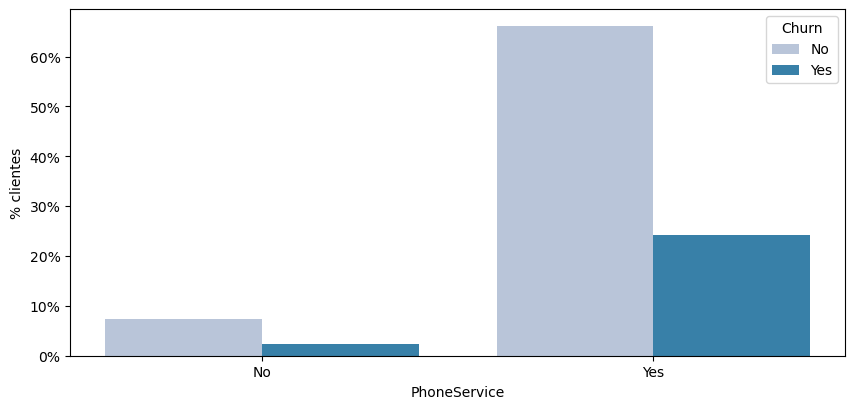

In [33]:
plt_percentages("PhoneService", df)

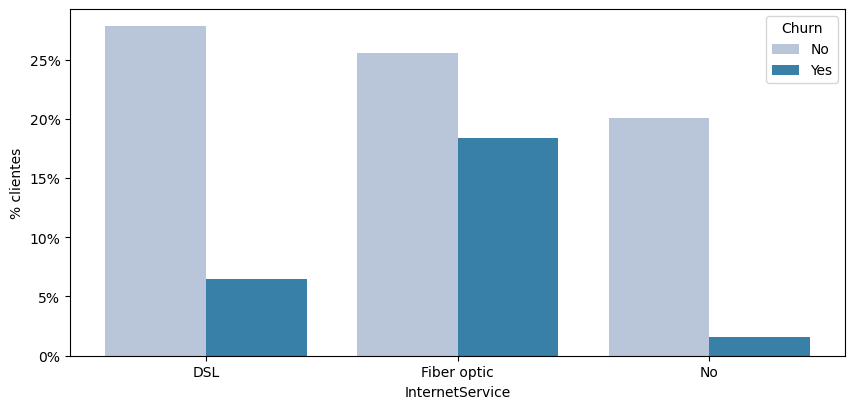

In [34]:
plt_percentages("InternetService", df)

#### Serviços adicionais de Internet

In [35]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
df1.head()

,variable,Has service
0,OnlineSecurity,No
1,OnlineSecurity,Yes
2,OnlineSecurity,Yes
3,OnlineSecurity,Yes
4,OnlineSecurity,No


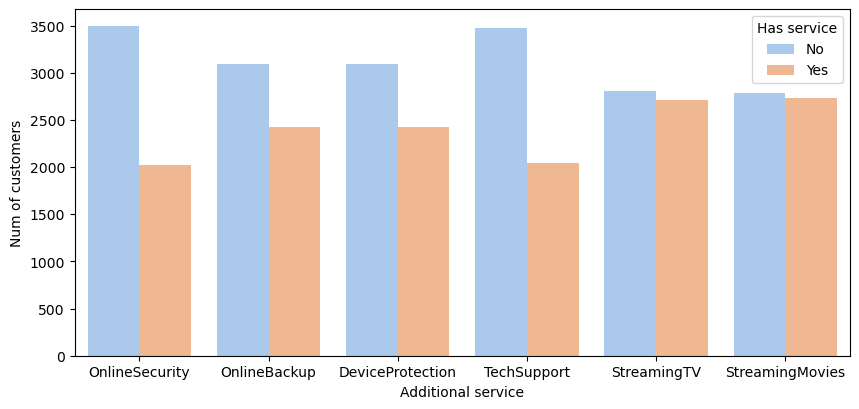

In [36]:
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service', palette="pastel")
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

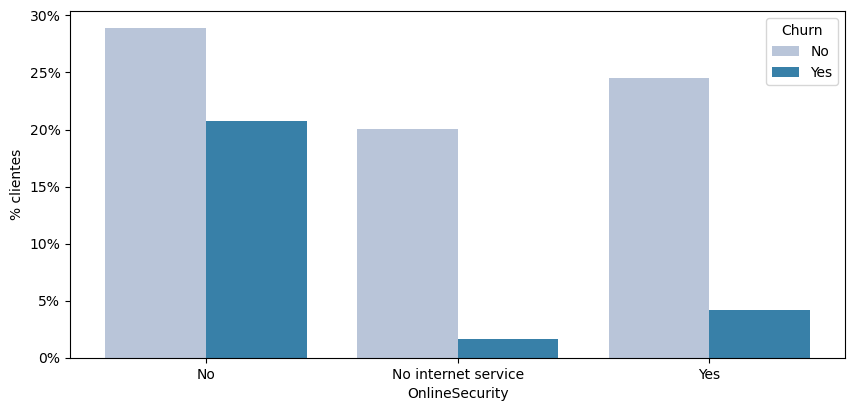

In [37]:
plt_percentages("OnlineSecurity", df)

#### Contrato e Pagamento

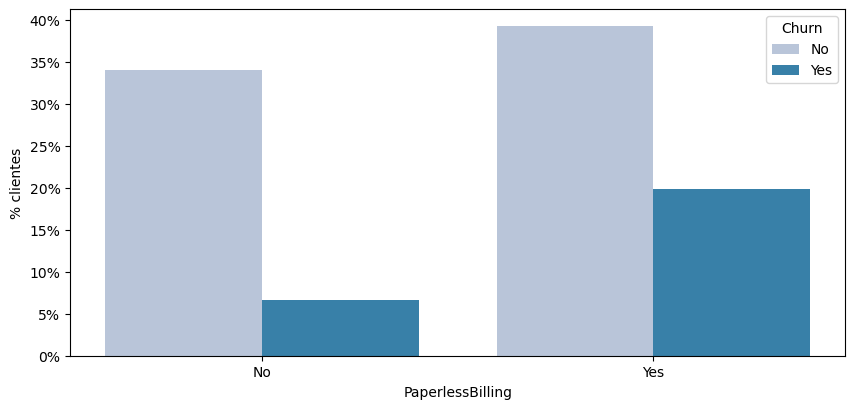

In [38]:
plt_percentages("PaperlessBilling", df)

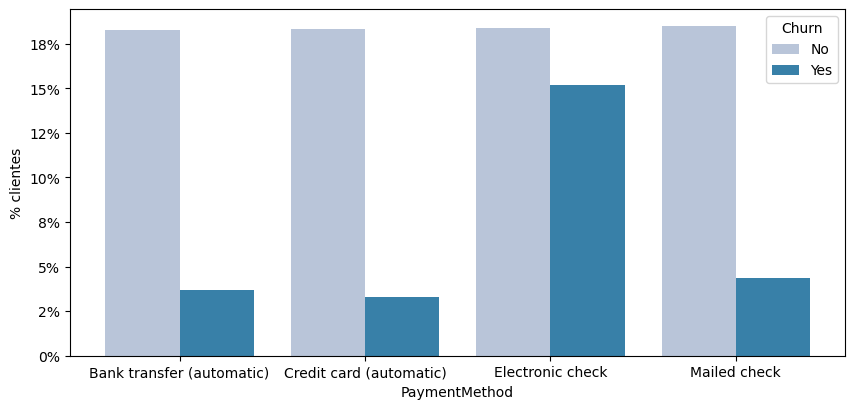

In [39]:
plt_percentages("PaymentMethod", df)

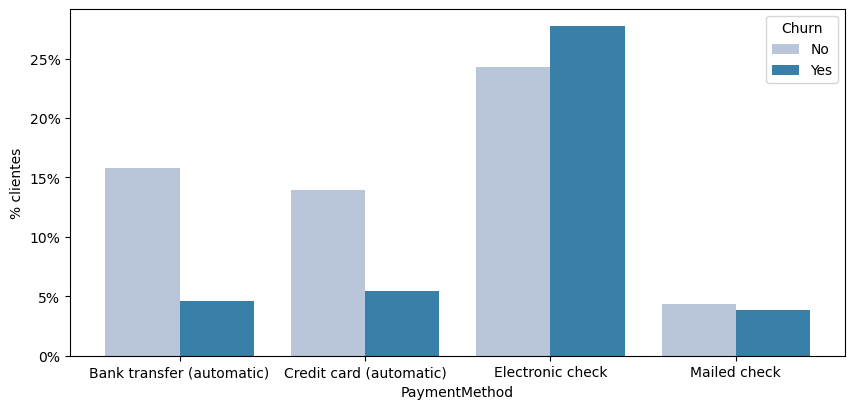

In [40]:
plt_percentages("PaymentMethod", df[df['SeniorCitizen'] == 1])

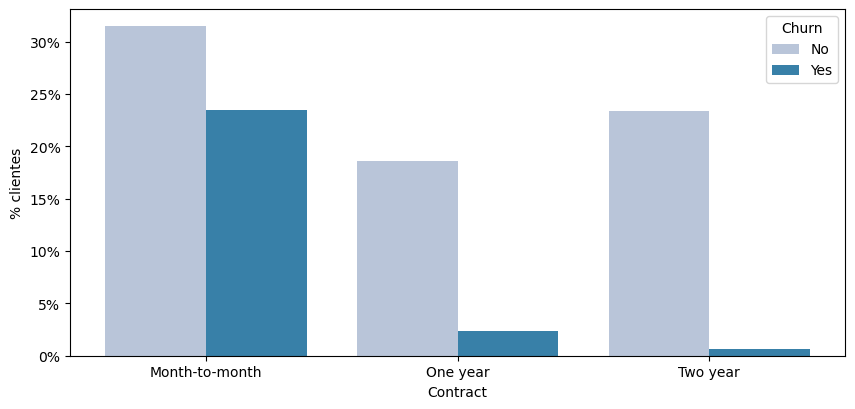

In [41]:
plt_percentages("Contract", df)

### Análise das Variáveis Numéricas

In [45]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

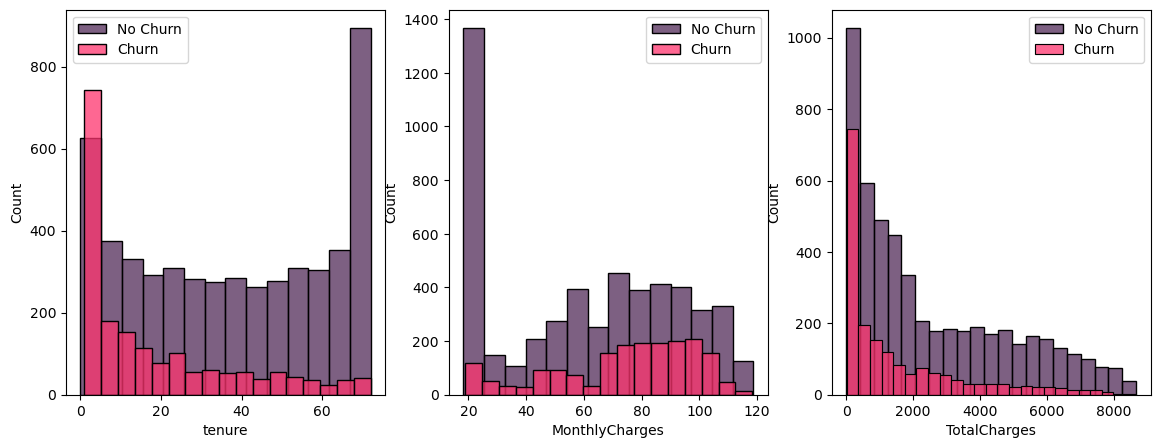

In [46]:
# Uma outra forma de ver a distribuição. Desta vez separando pela variável target
fig=plt.figure(figsize=(14, 5))
fig = plt.subplot(131)
sns.histplot(df[df['Churn'] == "No"]["tenure"],label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["tenure"],label='Churn', color='#fe346e')
plt.legend()

fig = plt.subplot(132)
sns.histplot(df[df['Churn'] == "No"]["MonthlyCharges"], label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["MonthlyCharges"], label='Churn', color='#fe346e') 
plt.legend()

fig = plt.subplot(133)
sns.histplot(df[df['Churn'] == "No"]["TotalCharges"], label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["TotalCharges"], label='Churn', color='#fe346e') 
plt.legend()

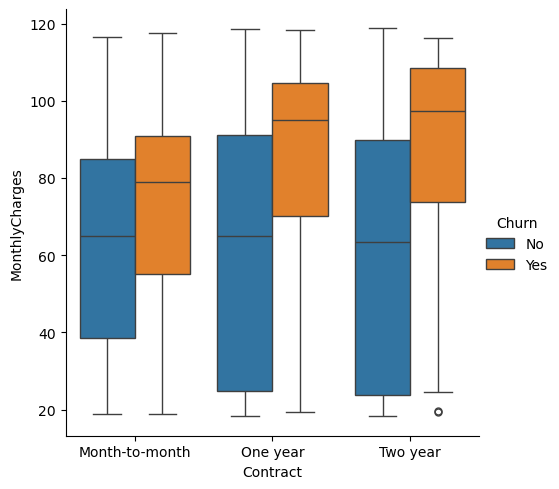

In [47]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df)

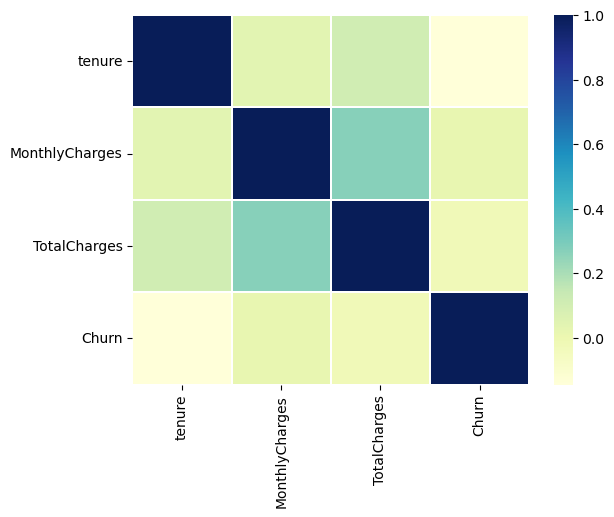

In [ ]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")